# DATA LOADING

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\supri\OneDrive\Documents\Food_Delivery_Times.csv")

In [3]:
print('Shape:',df.shape)
print(df.head())
print(df.info())

Shape: (1000, 9)
   Order_ID  Distance_km Weather Traffic_Level Time_of_Day Vehicle_Type  \
0       522         7.93   Windy           Low   Afternoon      Scooter   
1       738        16.42   Clear        Medium     Evening         Bike   
2       741         9.52   Foggy           Low       Night      Scooter   
3       661         7.44   Rainy        Medium   Afternoon      Scooter   
4       412        19.03   Clear           Low     Morning         Bike   

   Preparation_Time_min  Courier_Experience_yrs  Delivery_Time_min  
0                    12                     1.0                 43  
1                    20                     2.0                 84  
2                    28                     1.0                 59  
3                     5                     1.0                 37  
4                    16                     5.0                 68  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column  

In [4]:
df['Distance_km'].mean()

10.05997

# DATA CLEANING AND PREPROCESSING

## 1. HANDLING MISSING VALUES

In [5]:
print(df.isnull().sum())

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


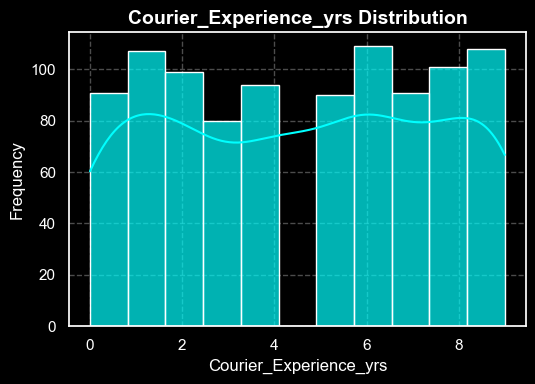

Skewness: -0.029086829121382836


In [6]:
sns.set_theme(style='darkgrid')
plt.style.use('dark_background')
cols = ['Courier_Experience_yrs']
plt.figure(figsize=(15, 4))
common_color = '#00FFFF' 
for i, col in enumerate(cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], kde=True, color=common_color, edgecolor='white', alpha=0.7)
    plt.title(f'{col} Distribution', fontsize=14, fontweight='bold', color='white')
    plt.xlabel(col, fontsize=12, color='white')
    plt.ylabel('Frequency', fontsize=12, color='white')
    plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()
print("Skewness:", df['Courier_Experience_yrs'].skew())  # automatically ignores NaNs

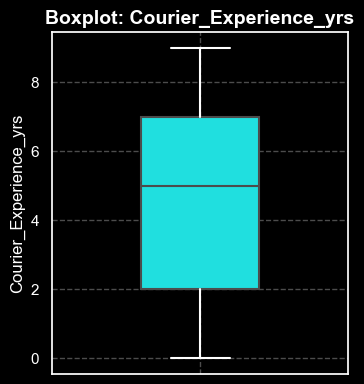


Summary statistics for Courier_Experience_yrs:
count    970.000000
mean       4.579381
std        2.914394
min        0.000000
25%        2.000000
50%        5.000000
75%        7.000000
max        9.000000
Name: Courier_Experience_yrs, dtype: float64


In [7]:
sns.set_theme(style='darkgrid')
plt.style.use('dark_background')
cols = ['Courier_Experience_yrs']
common_color = '#00FFFF'  # cyan
plt.figure(figsize=(10, 4)) 
for i, col in enumerate(cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(
        y=df[col],
        color=common_color,
        width=0.4,
        fliersize=3,
        whiskerprops=dict(color='white', linewidth=1.5),  # brighter whiskers
        capprops=dict(color='white', linewidth=1.5)       # caps visible too
    )
    plt.title(f'Boxplot: {col}', fontsize=14, fontweight='bold', color='white')
    plt.ylabel(col, fontsize=12, color='white')
    plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()
for col in cols:
    print(f"\nSummary statistics for {col}:")
    print(df[col].describe())

as courier exp column is fairly symmnetric because our absolute skewness value is less than 0.5 we are imputing nan values with mea

In [8]:
df['Courier_Experience_yrs'] = df['Courier_Experience_yrs'].fillna(df['Courier_Experience_yrs'].mean())
numeric_cols = ['Weather', 'Traffic_Level', 'Time_of_Day']
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [9]:
df.isnull().sum()

Order_ID                  0
Distance_km               0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
dtype: int64

# HANDLING OUTLIERS

In [10]:
# Select numeric columns
numeric_cols = ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs', 'Delivery_Time_min']

# Loop through each column and find outliers
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    print(f"\n * Column: {col}")
    print(f"Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
    print(f"Outliers detected: {outliers.shape[0]} ({(outliers.shape[0]/df.shape[0])*100:.2f}%)")



 * Column: Distance_km
Q1: 5.11, Q3: 15.02, IQR: 9.91
Lower Bound: -9.76, Upper Bound: 29.89
Outliers detected: 0 (0.00%)

 * Column: Preparation_Time_min
Q1: 11.00, Q3: 23.00, IQR: 12.00
Lower Bound: -7.00, Upper Bound: 41.00
Outliers detected: 0 (0.00%)

 * Column: Courier_Experience_yrs
Q1: 2.00, Q3: 7.00, IQR: 5.00
Lower Bound: -5.50, Upper Bound: 14.50
Outliers detected: 0 (0.00%)

 * Column: Delivery_Time_min
Q1: 41.00, Q3: 71.00, IQR: 30.00
Lower Bound: -4.00, Upper Bound: 116.00
Outliers detected: 6 (0.60%)


Correlation of numeric features with target:
Delivery_Time_min         1.000000
Distance_km               0.780998
Preparation_Time_min      0.307350
Order_ID                 -0.036650
Courier_Experience_yrs   -0.089066
Name: Delivery_Time_min, dtype: float64


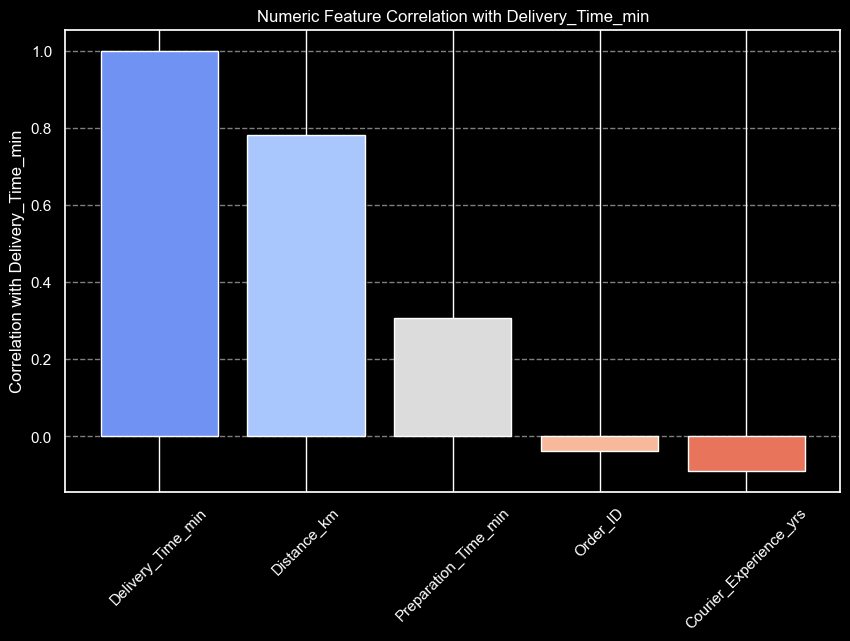


Correlation of categorical features with target (after encoding):
Traffic_Level    0.188082
Weather          0.179749
Vehicle_Type     0.032093
Time_of_Day      0.009082
dtype: float64

All features correlation with target:
Delivery_Time_min         1.000000
Distance_km               0.780998
Preparation_Time_min      0.307350
Traffic_Level             0.188082
Weather                   0.179749
Vehicle_Type              0.032093
Time_of_Day               0.009082
Order_ID                 -0.036650
Courier_Experience_yrs   -0.089066
dtype: float64


In [11]:
#  target column is 'Delivery_Time'
target = 'Delivery_Time_min'

#separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(exclude=np.number).columns.tolist()

#ensure target is numeric
if target not in numeric_cols:
    raise ValueError(f"Target column '{target}' must be numeric for correlation analysis.")

# correlation for numeric features
numeric_corr = df[numeric_cols].corr()[target].sort_values(ascending=False)
print("Correlation of numeric features with target:")
print(numeric_corr)

# Plot numeric correlations (future-proof)
plt.figure(figsize=(10,6))
bars = plt.bar(numeric_corr.index, numeric_corr.values, color=sns.color_palette('coolwarm', len(numeric_corr)))
plt.xticks(rotation=45)
plt.ylabel(f'Correlation with {target}')
plt.title(f'Numeric Feature Correlation with {target}')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

#Correlation for categorical features
# Encode categories numerically to get rough correlation
encoded_df = df[categorical_cols].apply(lambda x: pd.factorize(x)[0])
cat_corr = encoded_df.corrwith(df[target]).sort_values(ascending=False)

print("\nCorrelation of categorical features with target (after encoding):")
print(cat_corr)

#Combine numeric + categorical correlation for reference
combined_corr = pd.concat([numeric_corr, cat_corr])
print("\nAll features correlation with target:")
print(combined_corr.sort_values(ascending=False))

In [12]:
'''Order_ID -> unique identifier, not predictive and absolute value of correlation is less than 0.5
Vehicle_Type and Time_of_Day -> almost no correlation but,we want model to learn subtle patterns so, we are dropping Order_ID column'''

'Order_ID -> unique identifier, not predictive and absolute value of correlation is less than 0.5\nVehicle_Type and Time_of_Day -> almost no correlation but,we want model to learn subtle patterns so, we are dropping Order_ID column'

In [13]:
df = df.drop(['Order_ID'],axis=1)

# Exploratory Data Analysis (EDA) 

Q1: 41.00, Q3: 71.00, IQR: 30.00
Lower Bound: -4.00, Upper Bound: 116.00
Number of Outliers: 6 / 1000


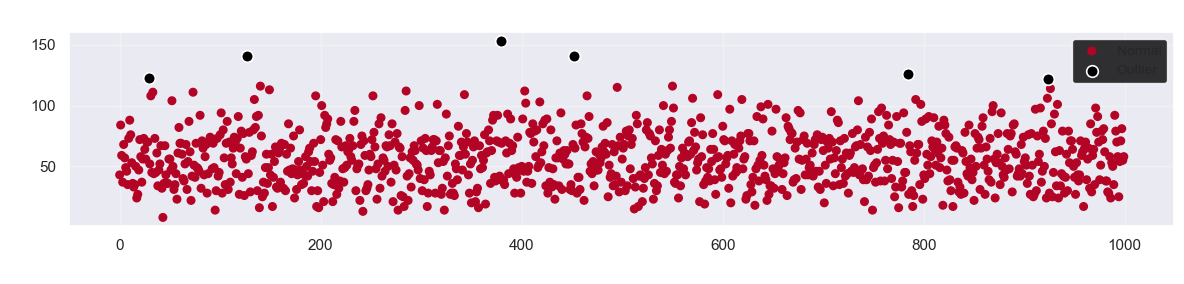

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set dark theme
plt.style.use('dark_background')
sns.set_theme(style='darkgrid')

# IQR method for outlier detection
Q1 = df['Delivery_Time_min'].quantile(0.25)
Q3 = df['Delivery_Time_min'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier_mask = (df['Delivery_Time_min'] < lower_bound) | (df['Delivery_Time_min'] > upper_bound)

# Print summary
print(f"Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
print(f"Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
print(f"Number of Outliers: {outlier_mask.sum()} / {len(df)}")

# 1D Scatter plot with highlighted outliers
plt.figure(figsize=(12, 3))
plt.scatter(range(len(df)), df['Delivery_Time_min'], 
            c=~outlier_mask, cmap='coolwarm', s=30, label='Normal')
plt.scatter(np.where(outlier_mask)[0], df.loc[outlier_mask, 'Delivery_Time_min'], 
            color='black', label='Outlier', s=70, edgecolor='white', linewidth=1.2)

# Aesthetic touches
plt.title('Delivery Time (IQR Outlier Detection)', fontsize=14, color='white')
plt.xlabel('Index', fontsize=12, color='white')
plt.ylabel('Delivery_Time_min', fontsize=12, color='white')
plt.legend(facecolor='black', edgecolor='white', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

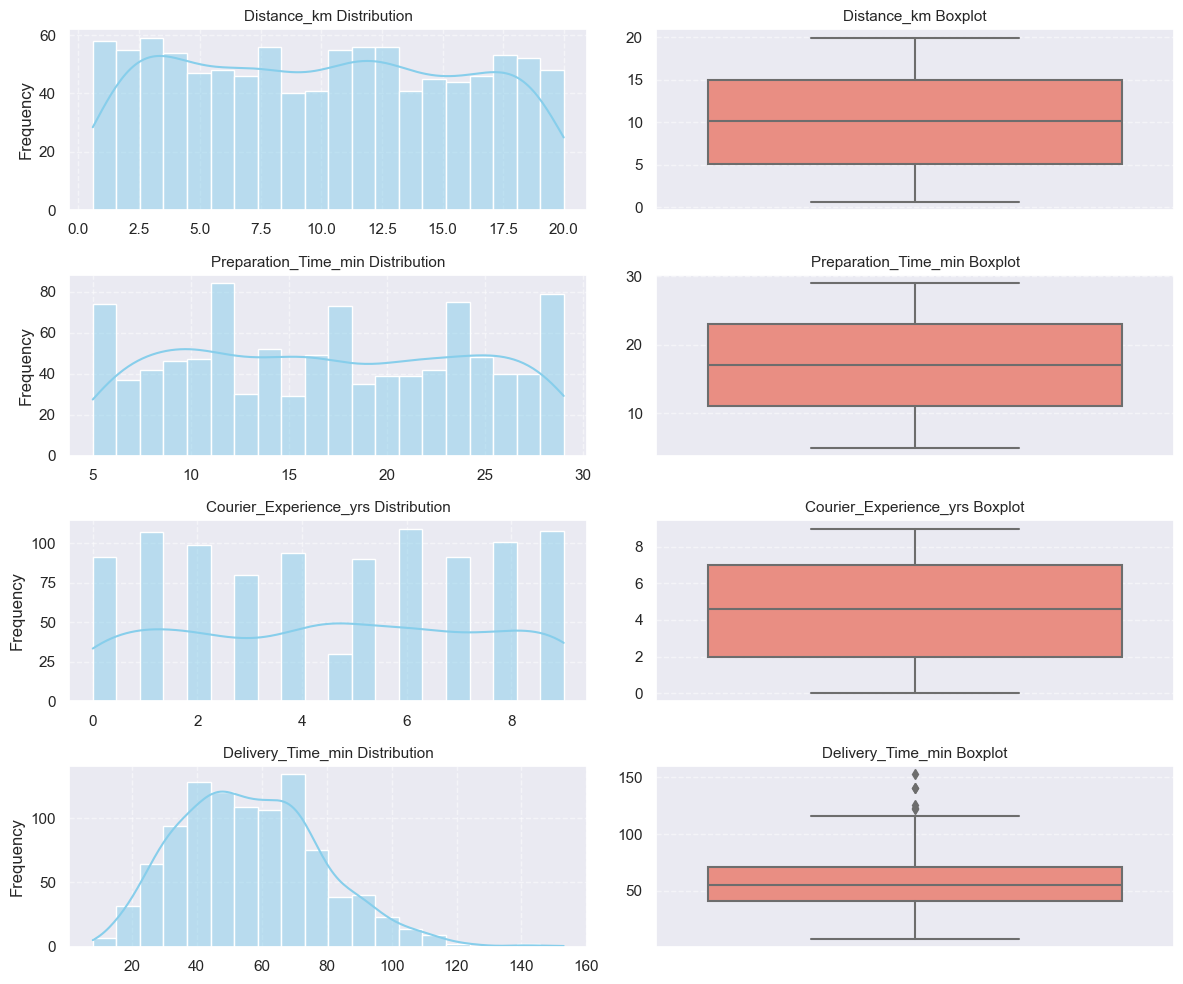

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs', 'Delivery_Time_min']

fig, axes = plt.subplots(len(num_cols), 2, figsize=(12, 10))

for i, col in enumerate(num_cols):
    # Histogram (left)
    sns.histplot(df[col], kde=True, bins=20, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'{col} Distribution', fontsize=11)
    axes[i, 0].set_xlabel('')
    axes[i, 0].set_ylabel('Frequency')
    axes[i, 0].grid(True, linestyle='--', alpha=0.5)

    #Boxplot (right)
    sns.boxplot(y=df[col], ax=axes[i, 1], color='salmon')
    axes[i, 1].set_title(f'{col} Boxplot', fontsize=11)
    axes[i, 1].set_xlabel('')
    axes[i, 1].set_ylabel('')
    axes[i, 1].grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


In [16]:
df['Distance_km'].mean()

10.05997

In [17]:
for col in num_cols:
    print(f"{col} skewness: {df[col].skew():.2f}, kurtosis: {df[col].kurtosis():.2f}")

Distance_km skewness: 0.04, kurtosis: -1.23
Preparation_Time_min skewness: 0.03, kurtosis: -1.24
Courier_Experience_yrs skewness: -0.03, kurtosis: -1.21
Delivery_Time_min skewness: 0.51, kurtosis: 0.29


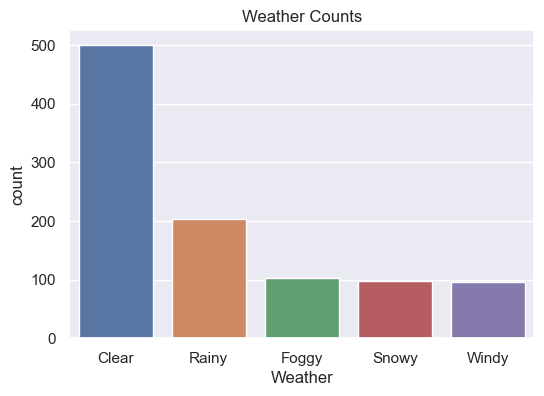

Weather
Clear    0.500
Rainy    0.204
Foggy    0.103
Snowy    0.097
Windy    0.096
Name: proportion, dtype: float64


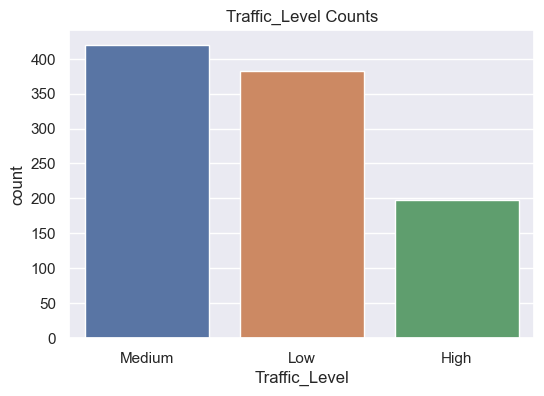

Traffic_Level
Medium    0.420
Low       0.383
High      0.197
Name: proportion, dtype: float64


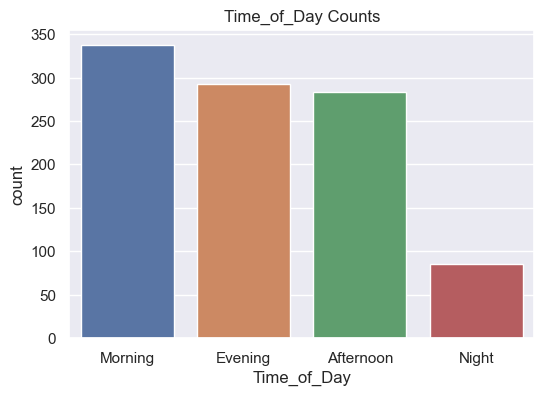

Time_of_Day
Morning      0.338
Evening      0.293
Afternoon    0.284
Night        0.085
Name: proportion, dtype: float64


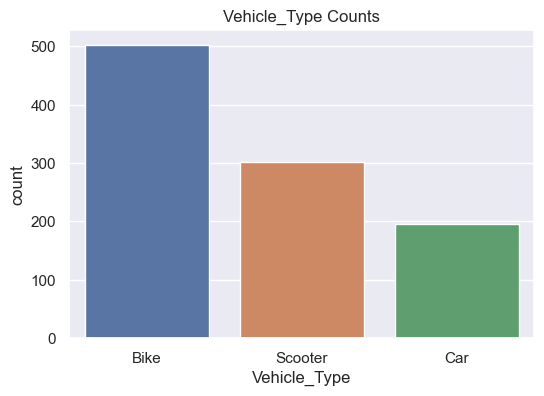

Vehicle_Type
Bike       0.503
Scooter    0.302
Car        0.195
Name: proportion, dtype: float64


In [18]:
cat_cols = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f'{col} Counts')
    plt.show()
    print(df[col].value_counts(normalize=True))

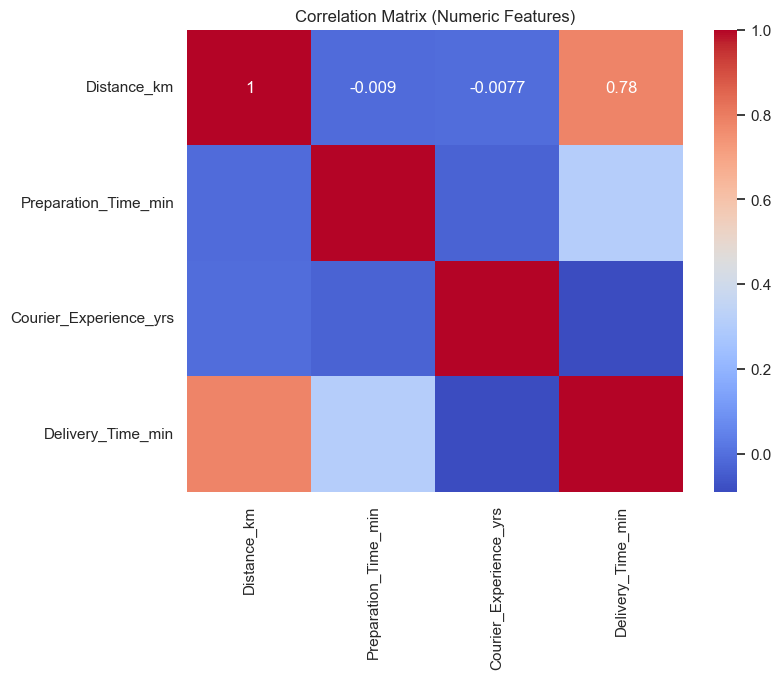

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Numeric Features)')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

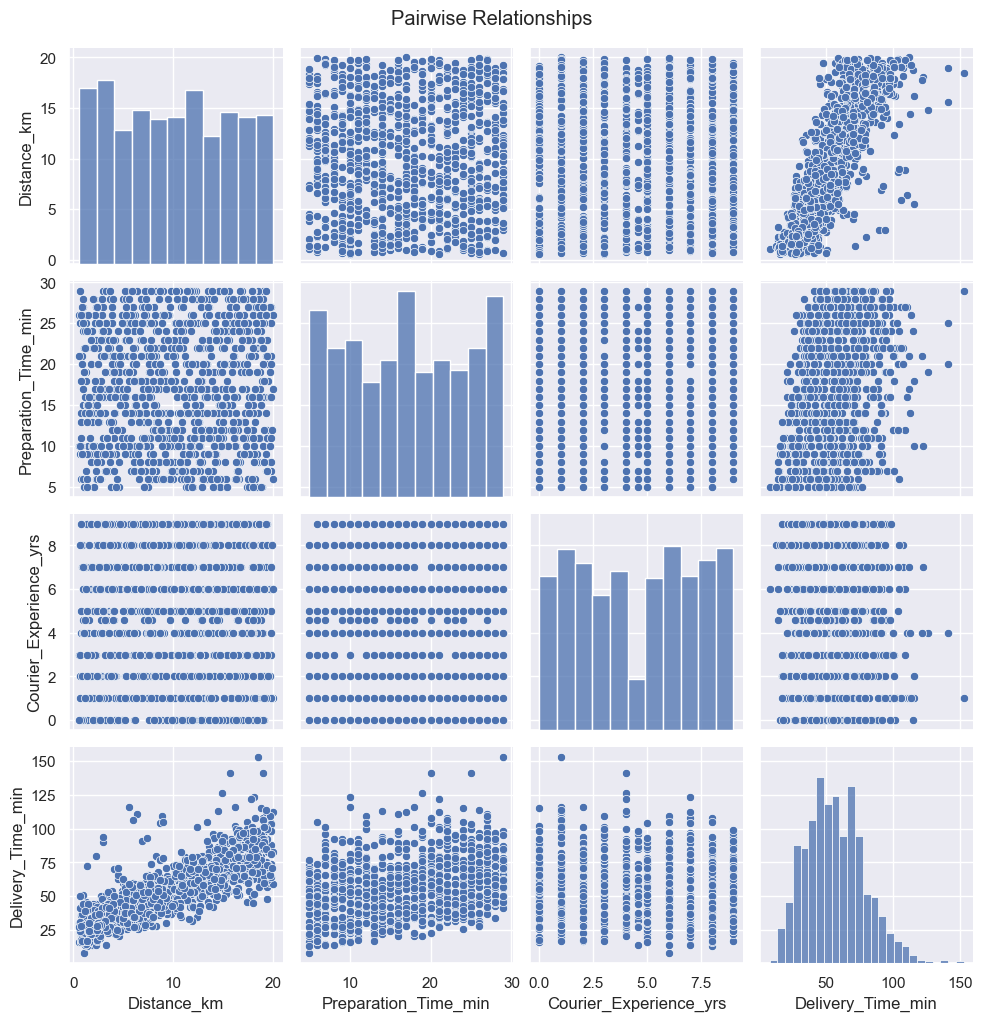

In [20]:
sns.pairplot(df[num_cols])
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

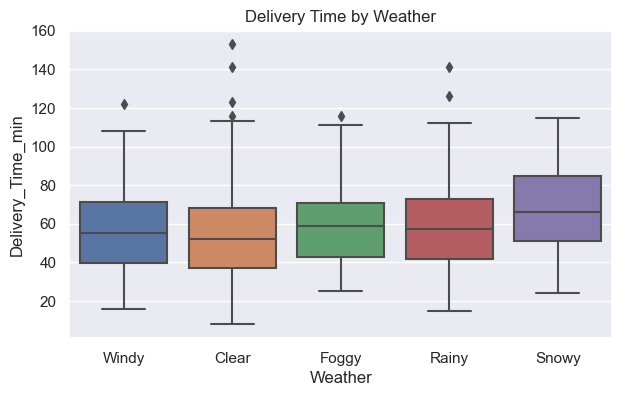

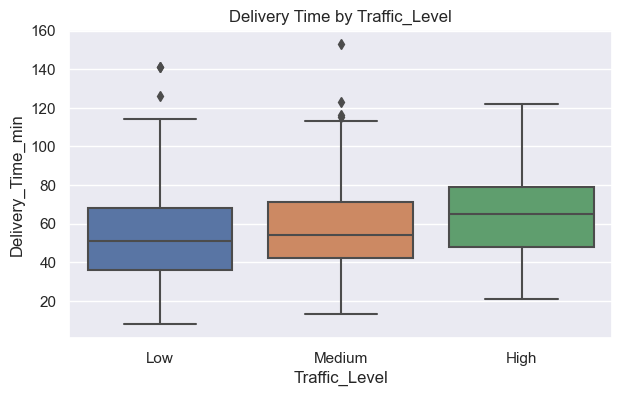

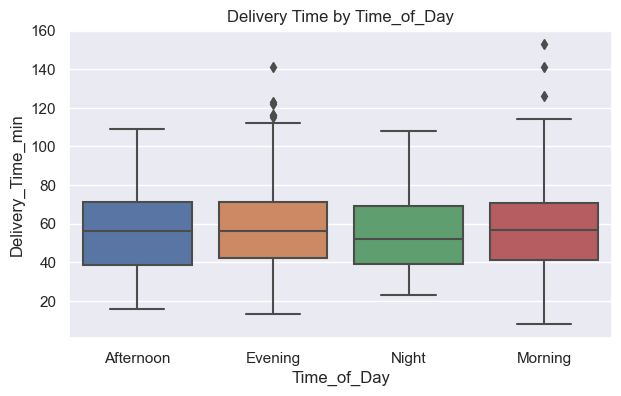

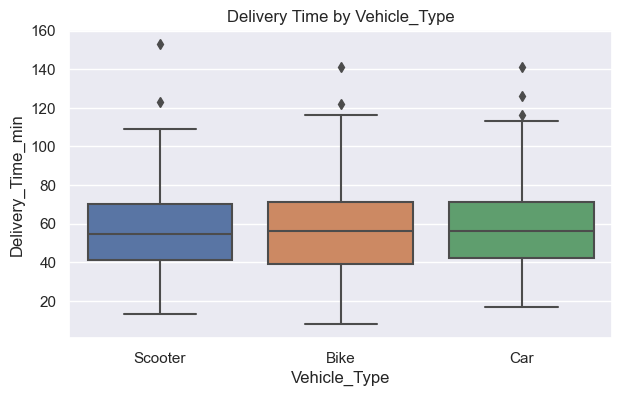

In [21]:
for col in cat_cols:
    plt.figure(figsize=(7,4))
    sns.boxplot(x=col, y='Delivery_Time_min', data=df)
    plt.title(f'Delivery Time by {col}')
    plt.show()

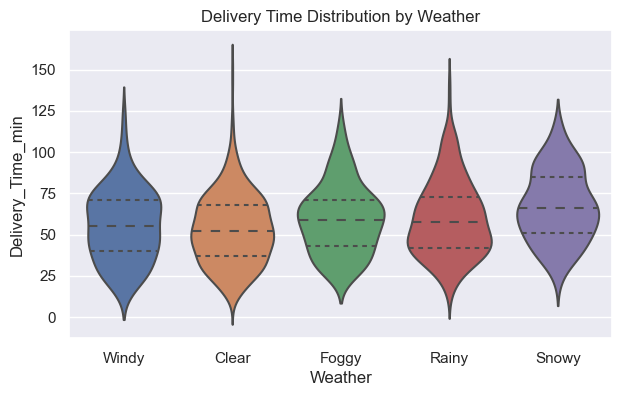

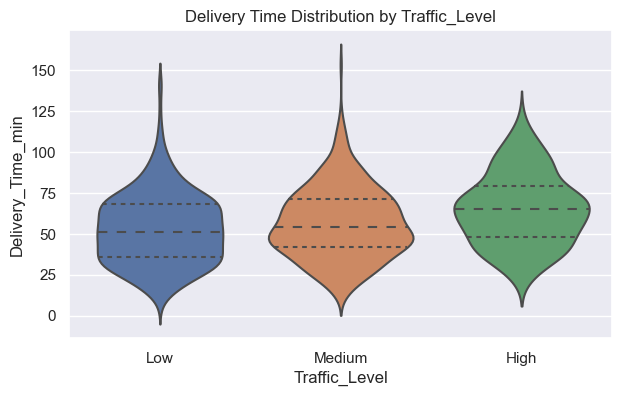

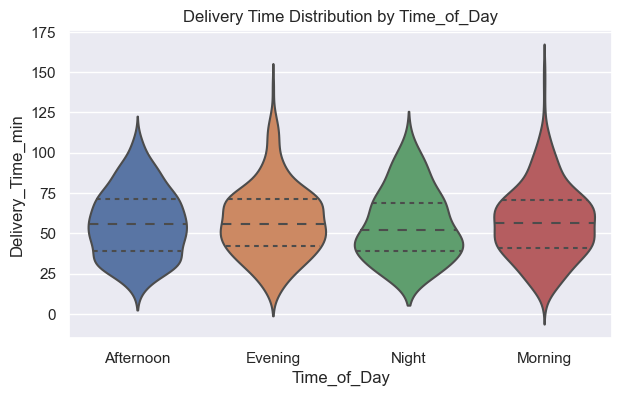

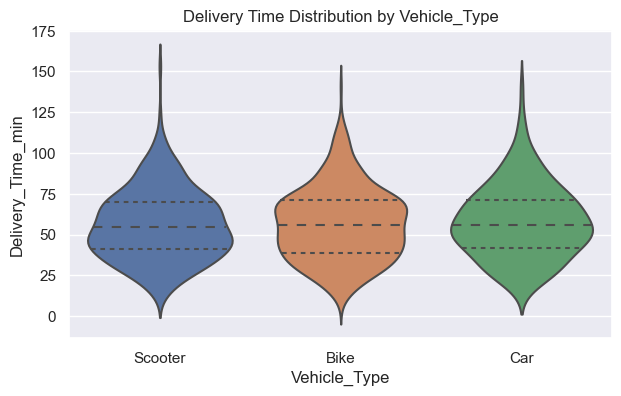

In [22]:
for col in cat_cols:
    plt.figure(figsize=(7,4))
    sns.violinplot(x=col, y='Delivery_Time_min', data=df, inner='quartile')
    plt.title(f'Delivery Time Distribution by {col}')
    plt.show() 

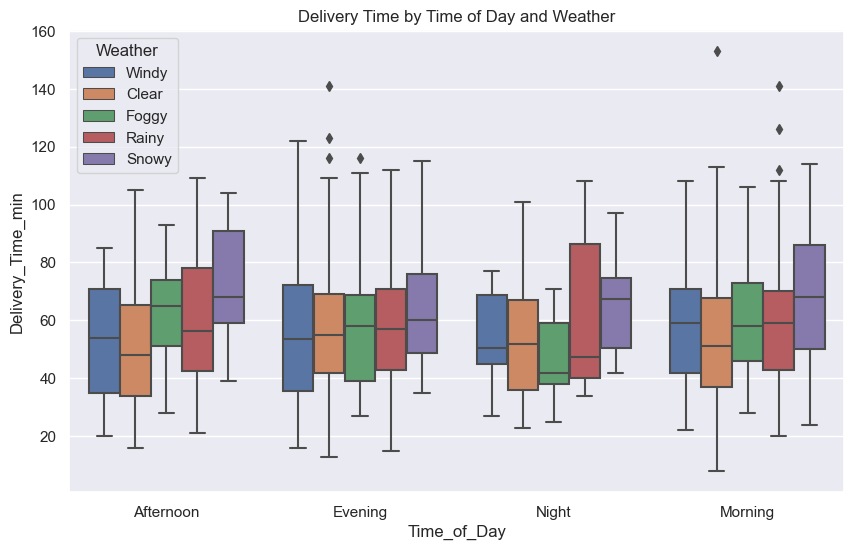

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Time_of_Day', y='Delivery_Time_min', hue='Weather', data=df)
plt.title('Delivery Time by Time of Day and Weather')
plt.show() 

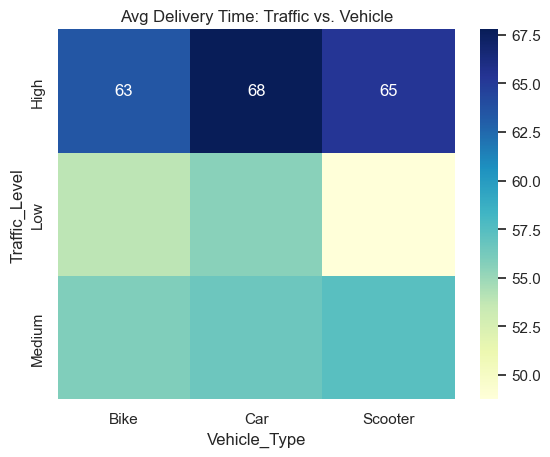

In [24]:
pivot = df.pivot_table(index='Traffic_Level', columns='Vehicle_Type', values='Delivery_Time_min', aggfunc='mean')
sns.heatmap(pivot, annot=True, cmap='YlGnBu')
plt.title('Avg Delivery Time: Traffic vs. Vehicle')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


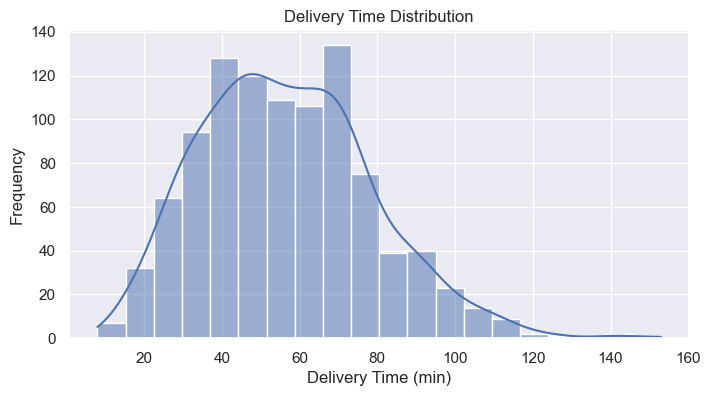

In [25]:
plt.figure(figsize=(8,4))
sns.histplot(df['Delivery_Time_min'], kde=True, bins=20)
plt.title('Delivery Time Distribution')
plt.xlabel('Delivery Time (min)')
plt.ylabel('Frequency')
plt.show()

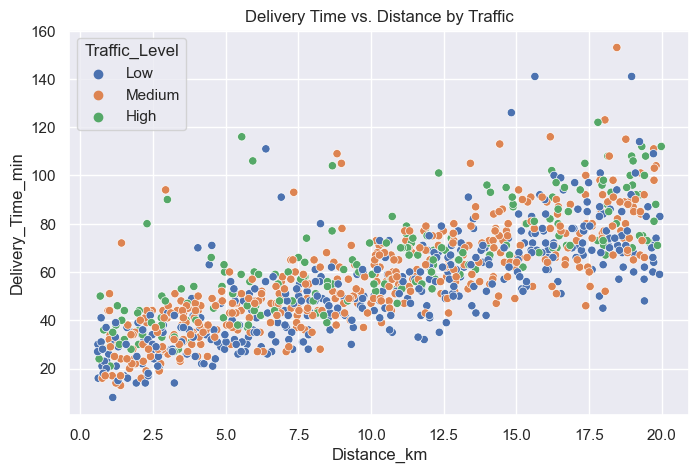

In [26]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Distance_km', y='Delivery_Time_min', hue='Traffic_Level', data=df)
plt.title('Delivery Time vs. Distance by Traffic')
plt.show()

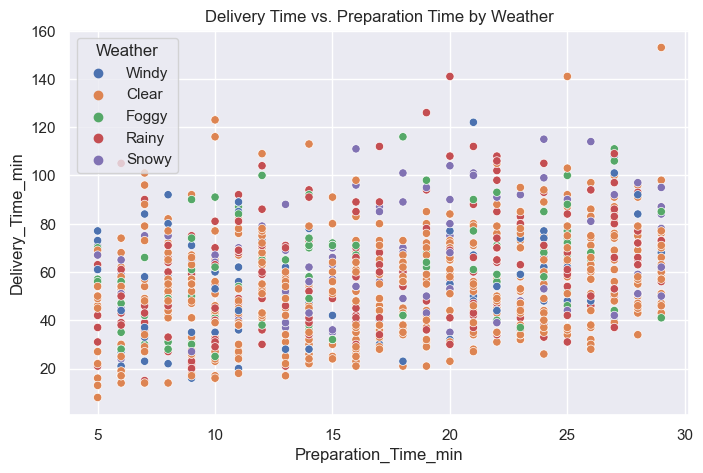

In [27]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Preparation_Time_min', y='Delivery_Time_min', hue='Weather', data=df)
plt.title('Delivery Time vs. Preparation Time by Weather')
plt.show()

In [28]:
#Capping outliers
cap = df['Delivery_Time_min'].quantile(0.99)
df['Delivery_Time_min'] = np.where(df['Delivery_Time_min'] > cap, cap, df['Delivery_Time_min'])

Q1: 41.00, Q3: 71.00, IQR: 30.00
Lower Bound: -4.00, Upper Bound: 116.00
Number of Outliers: 0 / 1000


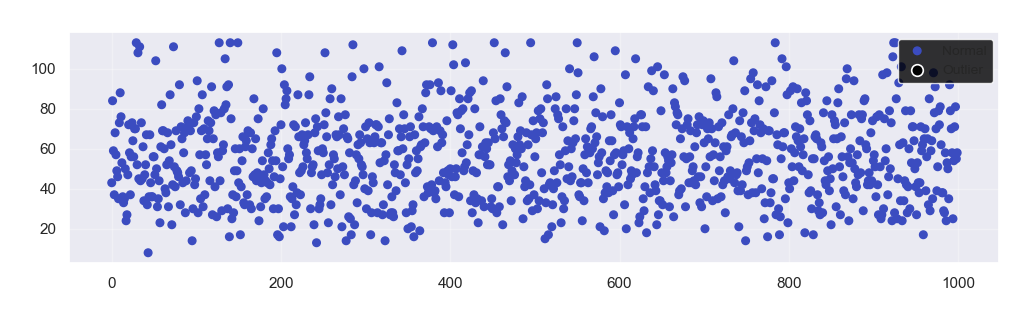

In [29]:
# After capping outliers , plotted the scatter plot 
plt.style.use('dark_background')
sns.set_theme(style='darkgrid')

#IQR method for outlier detection
Q1 = df['Delivery_Time_min'].quantile(0.25)
Q3 = df['Delivery_Time_min'].quantile(0.75)
IQR = Q3 - Q1

#define outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier_mask = (df['Delivery_Time_min'] < lower_bound) | (df['Delivery_Time_min'] > upper_bound)

#print summary
print(f"Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
print(f"Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
print(f"Number of Outliers: {outlier_mask.sum()} / {len(df)}")

#1D Scatter plot with highlighted outliers 
plt.figure(figsize=(12, 3))
plt.scatter(range(len(df)), df['Delivery_Time_min'], 
            c=~outlier_mask, cmap='coolwarm', s=30, label='Normal')
plt.scatter(np.where(outlier_mask)[0], df.loc[outlier_mask, 'Delivery_Time_min'], 
            color='black', label='Outlier', s=70, edgecolor='white', linewidth=1.2)

plt.title('Delivery Time (IQR Outlier Detection)', fontsize=14, color='white')
plt.xlabel('Index', fontsize=12, color='white')
plt.ylabel('Delivery_Time_min', fontsize=12, color='white')
plt.legend(facecolor='black', edgecolor='white', fontsize=10)
plt.grid(alpha=0.3)

# FEATURE ENGINEERING

In [30]:
# Encoding categorical features
from sklearn.preprocessing import OrdinalEncoder

categorical_cols = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']

#Ordinal encoding for Traffic_Level 
traffic_order = [['Low', 'Medium', 'High']]
encoder = OrdinalEncoder(categories=traffic_order)
df['Traffic_Level'] = encoder.fit_transform(df[['Traffic_Level']])

#OneHot encoding for other categorical features
df = pd.get_dummies(df, columns=['Weather', 'Time_of_Day', 'Vehicle_Type'], drop_first=True)

In [31]:
#Create interaction features
#Interaction between distance and traffic
df['Distance_Traffic'] = df['Distance_km'] * df['Traffic_Level']

In [32]:
# Create time-based features
#peak hours - Morning and Evening considered peak
df['Is_Peak_Hour'] = df['Time_of_Day_Morning'].combine(df['Time_of_Day_Evening'], max)

# just changing name of the column for clarity
df['Is_Night'] = df['Time_of_Day_Night']

In [33]:
#divide courier exp column into bins 
df['Experience_Level'] = pd.cut(df['Courier_Experience_yrs'], bins=[0,2,5,20], labels=['Novice','Intermediate','Expert'])

#one-hot encode experience level converts categerical to binary
df = pd.get_dummies(df, columns=['Experience_Level'], drop_first=True)

In [34]:
#Scale numeric features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs']

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [35]:
#create target-based or custom features

#flag high distance deliveries
# df['High_Distance'] = df['Distance_km'].apply(lambda x: 1 if x > 10 else 0)
  # top 25% distances
df['High_Distance'] = df['Distance_km'].apply(lambda x: 1 if x > 10 else 0)

#Create Risk Factor (Distance × Traffic × Peak_Hour)
df['Risk_Factor'] = df['Distance_km'] * df['Traffic_Level'] * df['Is_Peak_Hour']

# FEATURE SELECTION

Correlation of numeric features with target:

Delivery_Time_min         1.000000
Distance_km               0.788685
Distance_Traffic          0.520376
Risk_Factor               0.471366
Preparation_Time_min      0.308465
Traffic_Level             0.193894
Courier_Experience_yrs   -0.087708
High_Distance                  NaN
Name: Delivery_Time_min, dtype: float64


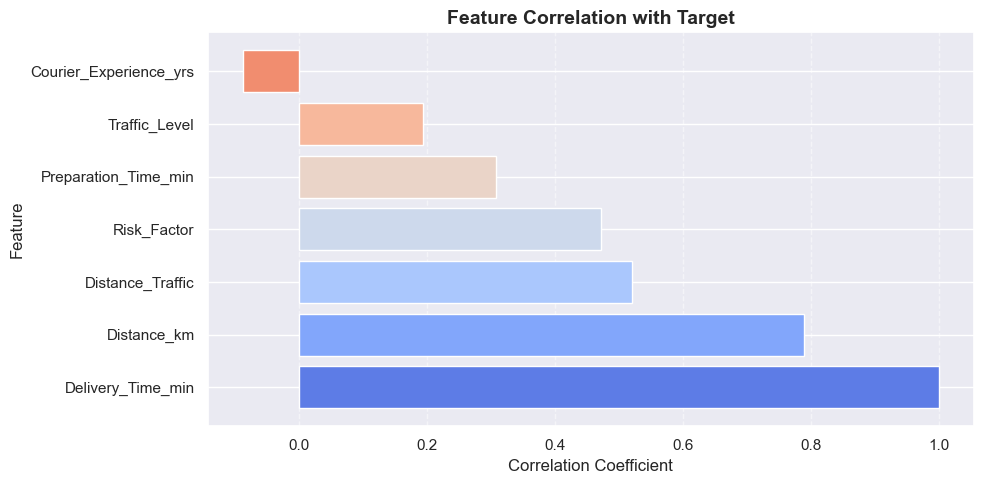


Selected Features Based on Correlation:
 ['Distance_km', 'Distance_Traffic', 'Risk_Factor', 'Preparation_Time_min', 'Traffic_Level']


In [36]:
target = 'Delivery_Time_min'

X = df.drop(columns=[target])
y = df[target]

#correlation analysis (numeric columns only)
numeric_cols = X.select_dtypes(include=np.number).columns.tolist()
corr = df[numeric_cols + [target]].corr()[target].sort_values(ascending=False)

print("Correlation of numeric features with target:\n")
print(corr)

#visualizing correlation
plt.figure(figsize=(10, 5))
colors = sns.color_palette('coolwarm', n_colors=len(corr))
plt.barh(corr.index, corr.values, color=colors)
plt.title("Feature Correlation with Target", fontsize=14, weight='bold')
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Select features based on correlation threshold
selected_features = corr[abs(corr) > 0.1].index.tolist()
selected_features.remove(target)
print("\nSelected Features Based on Correlation:\n", selected_features)

X_selected = X[selected_features]

                      Distance_km  Distance_Traffic  Risk_Factor  \
Distance_km              1.000000          0.476868     0.587671   
Distance_Traffic         0.476868          1.000000     0.523787   
Risk_Factor              0.587671          0.523787     1.000000   
Preparation_Time_min    -0.009037         -0.032960    -0.014145   
Traffic_Level            0.009264          0.770187     0.030461   

                      Preparation_Time_min  Traffic_Level  
Distance_km                      -0.009037       0.009264  
Distance_Traffic                 -0.032960       0.770187  
Risk_Factor                      -0.014145       0.030461  
Preparation_Time_min              1.000000      -0.026767  
Traffic_Level                    -0.026767       1.000000  


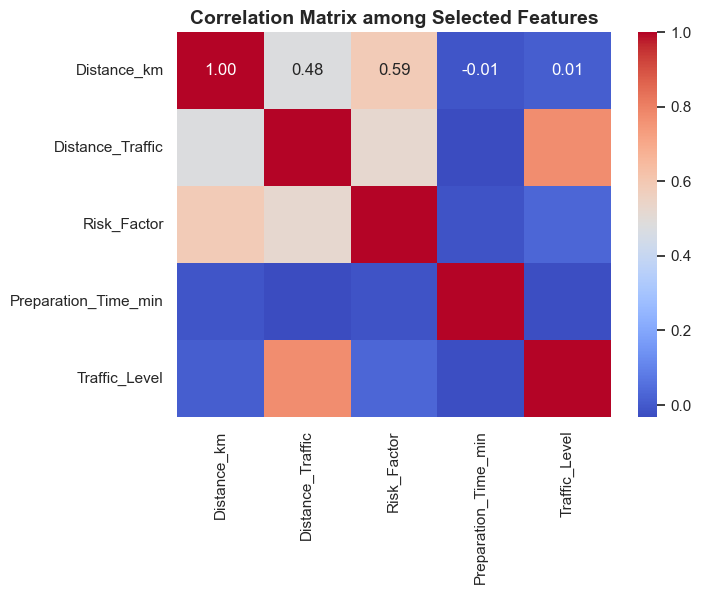

In [37]:
cols = ['Distance_km', 'Distance_Traffic', 'Risk_Factor', 'Preparation_Time_min', 'Traffic_Level']
corr_matrix = df[cols].corr()

print(corr_matrix)

#visualize it
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix among Selected Features', fontsize=14, weight='bold')
plt.show()

# LINEAR REGRESSION

In [38]:
#Linear Regression Model 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

#spliting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

#training model
lr = LinearRegression()
lr.fit(X_train, y_train)

#predicting 
y_pred = lr.predict(X_test)

#evaluating the model 
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Results:")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R² Score: {r2:.3f}")


Model Evaluation Results:
Mean Absolute Error (MAE): 6.839
R² Score: 0.792


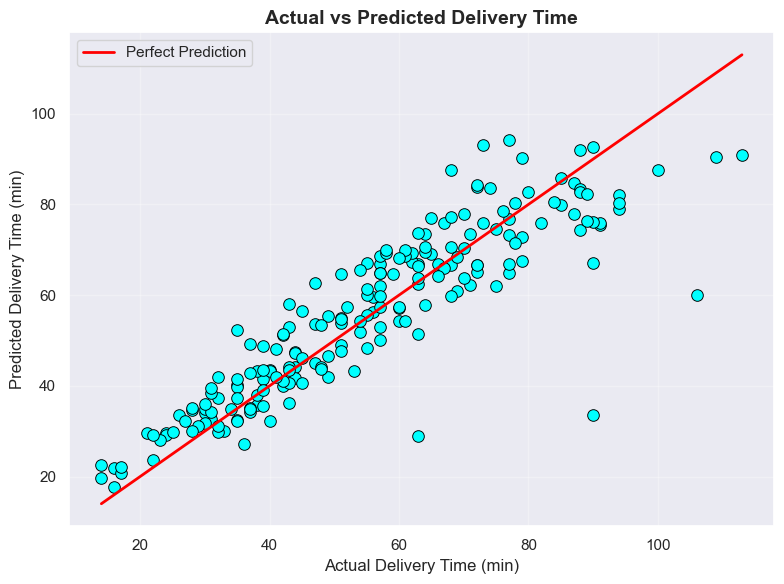

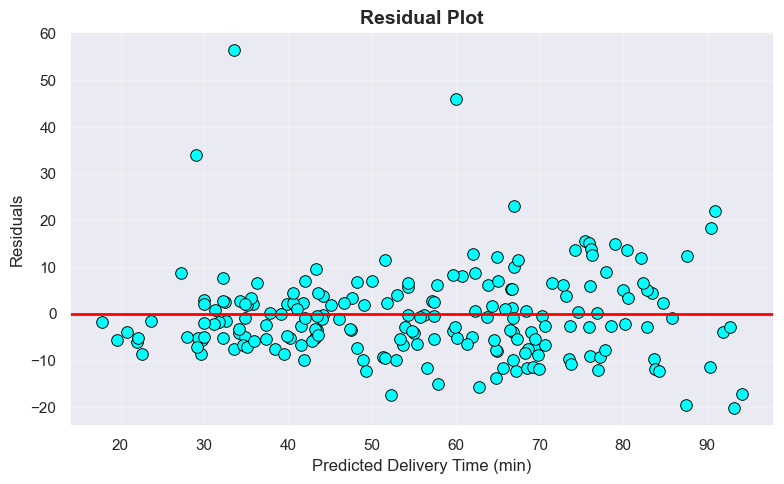

In [39]:
#actual vs predicted plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color='cyan', edgecolor='black', s=70)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color='red', linestyle='-', linewidth=2, label='Perfect Prediction')
plt.title('Actual vs Predicted Delivery Time', fontsize=14, weight='bold')
plt.xlabel('Actual Delivery Time (min)')
plt.ylabel('Predicted Delivery Time (min)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuals, color='cyan', edgecolor='black', s=70)
plt.axhline(0, color='red', linestyle='-', linewidth=2)
plt.title('Residual Plot', fontsize=14, weight='bold')
plt.xlabel('Predicted Delivery Time (min)')
plt.ylabel('Residuals')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [40]:
# ============================
# FINAL: Clean A+ pipeline (threshold=75th percentile + XGB/GB/RF + SMOTE + stacking)
# Paste after your preprocessing cells. Assumes `df` exists and contains Delivery_Time_min.
# ============================

import warnings, time, math
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_predict, RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import StackingClassifier, StackingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix,
                             mean_absolute_error, mean_squared_error, r2_score, brier_score_loss,
                             precision_recall_curve, auc, average_precision_score)
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [41]:

# optional libs
try:
    import xgboost as xgb
    XGB_AVAILABLE = True
except Exception:
    XGB_AVAILABLE = False

try:
    from imblearn.over_sampling import SMOTE
    IMB_AVAILABLE = True
except Exception:
    IMB_AVAILABLE = False

RND = 42
np.random.seed(RND)

# -------------------------
# Sanity check
# -------------------------
assert "Delivery_Time_min" in df.columns, "df must contain 'Delivery_Time_min'"

In [42]:


# -------------------------
# Keep only the requested base features (if present)
# and add 4 engineered features.
# -------------------------
base_features = [
    "Distance_km","Traffic_Level","Preparation_Time_min","Courier_Experience_yrs",
    "Weather_Foggy","Weather_Rainy","Weather_Snowy","Weather_Windy",
    "Time_of_Day_Evening","Time_of_Day_Night","Vehicle_Type_Car","Vehicle_Type_Scooter",
    "Distance_Traffic","Is_Peak_Hour","Is_Night",
    "Experience_Level_Intermediate","Experience_Level_Expert",
    "High_Distance","Risk_Factor"
]

# Some notebooks may have Time_of_Day_Morning instead of Evening/Night etc. We'll keep what's available.
available_base = [c for c in base_features if c in df.columns]
print("Using base features (available):", available_base)

# Add the 4 engineered features safely
# Weather_Severity = sum of weather booleans
weather_cols = [c for c in ["Weather_Foggy","Weather_Rainy","Weather_Snowy","Weather_Windy"] if c in df.columns]
if weather_cols:
    df["Weather_Severity"] = df[weather_cols].sum(axis=1)
else:
    df["Weather_Severity"] = 0

# Speed_kmph = Distance_km / (Preparation_Time_min/60) ; guard divide by zero
if "Distance_km" in df.columns and "Preparation_Time_min" in df.columns:
    df["Speed_kmph"] = df["Distance_km"] / (df["Preparation_Time_min"].replace(0,1) / 60)
else:
    df["Speed_kmph"] = 0

# Experience_X_Traffic
if "Courier_Experience_yrs" in df.columns and "Traffic_Level" in df.columns:
    df["Experience_X_Traffic"] = df["Courier_Experience_yrs"] * df["Traffic_Level"]
else:
    df["Experience_X_Traffic"] = 0

# Complexity_Score = Risk_Factor + Traffic_Level + Weather_Severity (use zeros if missing)
df["Complexity_Score"] = df.get("Risk_Factor", 0) + df.get("Traffic_Level", 0) + df["Weather_Severity"]

# Final chosen features for models (base + engineered)
chosen_features = [c for c in available_base] + ["Weather_Severity","Speed_kmph","Experience_X_Traffic","Complexity_Score"]
# remove duplicates & ensure existing
chosen_features = [c for i,c in enumerate(chosen_features) if c in df.columns and c not in chosen_features[:i]]
print("Final chosen features (count={}):".format(len(chosen_features)), chosen_features)

# Convert booleans to int
for c in chosen_features:
    if df[c].dtype == "bool":
        df[c] = df[c].astype(int)

Using base features (available): ['Distance_km', 'Traffic_Level', 'Preparation_Time_min', 'Courier_Experience_yrs', 'Weather_Foggy', 'Weather_Rainy', 'Weather_Snowy', 'Weather_Windy', 'Time_of_Day_Evening', 'Time_of_Day_Night', 'Vehicle_Type_Car', 'Vehicle_Type_Scooter', 'Distance_Traffic', 'Is_Peak_Hour', 'Is_Night', 'Experience_Level_Intermediate', 'Experience_Level_Expert', 'High_Distance', 'Risk_Factor']
Final chosen features (count=23): ['Distance_km', 'Traffic_Level', 'Preparation_Time_min', 'Courier_Experience_yrs', 'Weather_Foggy', 'Weather_Rainy', 'Weather_Snowy', 'Weather_Windy', 'Time_of_Day_Evening', 'Time_of_Day_Night', 'Vehicle_Type_Car', 'Vehicle_Type_Scooter', 'Distance_Traffic', 'Is_Peak_Hour', 'Is_Night', 'Experience_Level_Intermediate', 'Experience_Level_Expert', 'High_Distance', 'Risk_Factor', 'Weather_Severity', 'Speed_kmph', 'Experience_X_Traffic', 'Complexity_Score']



STEP A: OOF regression to estimate expected delivery time (no leakage)...
Residual mean=-0.013, std=10.885, MAE=7.334


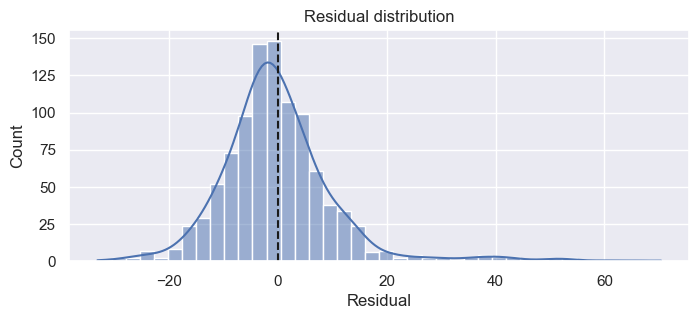

In [43]:

# -------------------------
# STEP A: OOF regression to estimate expected delivery time
# -------------------------
print("\nSTEP A: OOF regression to estimate expected delivery time (no leakage)...")
X_reg = df[chosen_features].copy()
# For regression keep numeric only (drop any object columns)
for c in X_reg.columns:
    if X_reg[c].dtype == "object":
        try:
            X_reg[c] = pd.to_numeric(X_reg[c])
        except Exception:
            X_reg.drop(columns=[c], inplace=True)

X_reg = X_reg.fillna(0)
y_reg = df["Delivery_Time_min"].values

oof_model = RandomForestRegressor(n_estimators=200, random_state=RND, n_jobs=-1)
oof_preds = cross_val_predict(oof_model, X_reg, y_reg, cv=5, method="predict", n_jobs=-1)
df["Reg_Pred"] = oof_preds
df["Residual"] = df["Delivery_Time_min"] - df["Reg_Pred"]
print("Residual mean={:.3f}, std={:.3f}, MAE={:.3f}".format(df["Residual"].mean(), df["Residual"].std(), np.mean(np.abs(df["Residual"]))))
plt.figure(figsize=(8,3)); sns.histplot(df["Residual"], bins=40, kde=True); plt.axvline(0,color='k',linestyle='--'); plt.title("Residual distribution"); plt.show()


In [44]:
# -------------------------
# STEP B: Smart threshold -> 75th percentile residual
# -------------------------
epsilon = df["Residual"].quantile(0.75)
print(f"\nSTEP B: Using 75th percentile of residuals as delay threshold: epsilon = {epsilon:.3f} minutes")
df["Delayed"] = (df["Residual"] > epsilon).astype(int)
print(df["Delayed"].value_counts(), "\nPercent delayed: {:.2f}%".format(df["Delayed"].mean()*100))


STEP B: Using 75th percentile of residuals as delay threshold: epsilon = 4.162 minutes
Delayed
0    750
1    250
Name: count, dtype: int64 
Percent delayed: 25.00%


In [45]:
# -------------------------
# STEP C: Build classification dataset
# -------------------------
# Drop Reg_Pred/Residual from features
X = df[chosen_features].copy().fillna(0)
y = df["Delayed"].copy()

# Train/test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=RND, stratify=y)
print("\nTrain/test shapes:", X_train.shape, X_test.shape)
print("Train class balance:\n", y_train.value_counts(normalize=True))


Train/test shapes: (800, 23) (200, 23)
Train class balance:
 Delayed
0    0.75
1    0.25
Name: proportion, dtype: float64


In [46]:


# -------------------------
# STEP D: Apply SMOTE if available + class_weight fallback
# -------------------------
if IMB_AVAILABLE:
    print("\nSMOTE found — applying SMOTE to training set")
    sm = SMOTE(random_state=RND)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
    print("After SMOTE:", X_train_res.shape, y_train_res.value_counts(normalize=True))
else:
    print("\nSMOTE not available — using class_weight in classifiers")
    X_train_res, y_train_res = X_train, y_train

# -------------------------
# STEP E: Fit main models (XGBoost preferred, else GB), RandomForest, GradientBoosting
# and do light RandomizedSearchCV tuning for XGB and GB
# -------------------------
print("\nSTEP E: Training main models (XGB/GB + RF) and tuning (light)")



SMOTE found — applying SMOTE to training set
After SMOTE: (1200, 23) Delayed
0    0.5
1    0.5
Name: proportion, dtype: float64

STEP E: Training main models (XGB/GB + RF) and tuning (light)


In [47]:

# RandomForest
rf = RandomForestClassifier(n_estimators=300, class_weight="balanced", random_state=RND, n_jobs=-1)
rf.fit(X_train_res, y_train_res)

RandomForestClassifier(class_weight='balanced', n_estimators=300, n_jobs=-1,
                       random_state=42)

In [48]:

# GradientBoosting (sklearn)
gb = GradientBoostingClassifier(random_state=RND)
# light tuning for GB
gb_param = {"n_estimators":[100,200], "max_depth":[3,5], "learning_rate":[0.05,0.1]}
gb_search = RandomizedSearchCV(GradientBoostingClassifier(random_state=RND), gb_param, n_iter=4, scoring="f1", cv=3, random_state=RND, n_jobs=-1)
gb_search.fit(X_train_res, y_train_res)
gb = gb_search.best_estimator_
print("GB tuned params:", gb_search.best_params_)

GB tuned params: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1}


In [49]:

# XGBoost (if available)
xgb_model = None
if XGB_AVAILABLE:
    xgb_param = {"n_estimators":[100,200], "max_depth":[3,5], "learning_rate":[0.03,0.05], "subsample":[0.7,1.0]}
    xgb_search = RandomizedSearchCV(xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=RND, n_jobs=-1),
                                    xgb_param, n_iter=4, scoring="f1", cv=3, random_state=RND, n_jobs=-1)
    xgb_search.fit(X_train_res, y_train_res)
    xgb_model = xgb_search.best_estimator_
    print("XGB tuned params:", xgb_search.best_params_)
else:
    print("XGBoost not installed — using GB + RF + ET as top models")


XGB tuned params: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.03}


In [50]:

# ExtraTrees as a solid third if xgb missing
et = ExtraTreesClassifier(n_estimators=300, random_state=RND, n_jobs=-1)
et.fit(X_train_res, y_train_res)

# Evaluate models on test set and collect metrics
models_eval = {}
for name, m in [("RandomForest", rf), ("GradientBoosting", gb), ("ExtraTrees", et)] + ([("XGBoost", xgb_model)] if xgb_model is not None else []):
    if m is None:
        continue
    preds = m.predict(X_test)
    probs = m.predict_proba(X_test)[:,1]
    f1 = f1_score(y_test, preds)
    acc = accuracy_score(y_test, preds)
    roc = roc_auc_score(y_test, probs)
    pr = average_precision_score(y_test, probs)
    models_eval[name] = {"model":m, "f1":f1, "acc":acc, "roc":roc, "pr":pr}
    print(f"{name:12s} -> Acc={acc:.3f}, F1={f1:.3f}, ROC={roc:.3f}, AP={pr:.3f}")

# Pick top 3 models by F1 for stacking
sorted_by_f1 = sorted(models_eval.items(), key=lambda kv: kv[1]["f1"], reverse=True)
top3 = sorted_by_f1[:3]
print("\nTop 3 models for stacking (by test F1):", [k for k,_ in top3])

RandomForest -> Acc=0.690, F1=0.205, ROC=0.613, AP=0.343
GradientBoosting -> Acc=0.690, F1=0.225, ROC=0.572, AP=0.302
ExtraTrees   -> Acc=0.675, F1=0.253, ROC=0.611, AP=0.329
XGBoost      -> Acc=0.680, F1=0.319, ROC=0.651, AP=0.377

Top 3 models for stacking (by test F1): ['XGBoost', 'ExtraTrees', 'GradientBoosting']


In [51]:
# -------------------------
# STEP F: Build stacking classifier with top3
# -------------------------
estimators = []
for k, v in top3:
    estimators.append((k, v["model"]))

stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(max_iter=1000, class_weight="balanced"), cv=5, n_jobs=-1, passthrough=False)
stack.fit(X_train_res, y_train_res)
stack_pred = stack.predict(X_test)
stack_proba = stack.predict_proba(X_test)[:,1]

stack_f1 = f1_score(y_test, stack_pred)
stack_acc = accuracy_score(y_test, stack_pred)
stack_roc = roc_auc_score(y_test, stack_proba)
stack_ap = average_precision_score(y_test, stack_proba)
print("\nStacking results -> Acc={:.3f}, F1={:.3f}, ROC={:.3f}, AP={:.3f}".format(stack_acc, stack_f1, stack_roc, stack_ap))
print("\nClassification report (stacking):\n", classification_report(y_test, stack_pred))


Stacking results -> Acc=0.695, F1=0.265, ROC=0.621, AP=0.333

Classification report (stacking):
               precision    recall  f1-score   support

           0       0.77      0.85      0.81       150
           1       0.33      0.22      0.27        50

    accuracy                           0.69       200
   macro avg       0.55      0.54      0.54       200
weighted avg       0.66      0.69      0.67       200



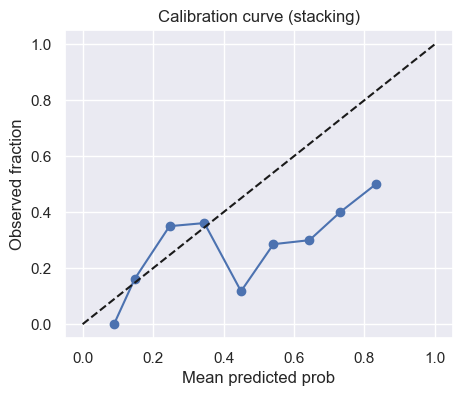

Brier score (stacking): 0.200354467321454
Best threshold by F1: 0.2 F1: 0.45454545454545453


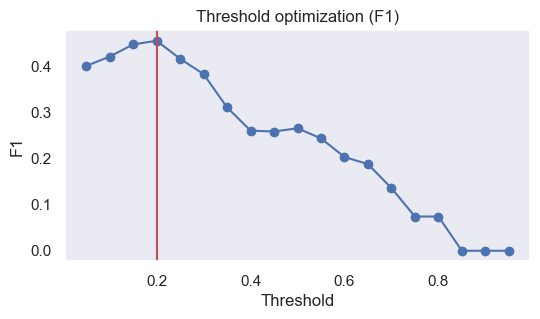

Optimized stacking metrics -> Acc=0.520, F1=0.455
Confusion matrix:
 [[64 86]
 [10 40]]


In [52]:

# -------------------------
# STEP G: Calibration & Threshold optimization (optimize threshold for F1)
# -------------------------
from sklearn.calibration import calibration_curve
probs = stack_proba
prob_true, prob_pred = calibration_curve(y_test, probs, n_bins=10)

plt.figure(figsize=(5,4)); plt.plot(prob_pred, prob_true, marker='o'); plt.plot([0,1],[0,1],'k--'); plt.title("Calibration curve (stacking)"); plt.xlabel("Mean predicted prob"); plt.ylabel("Observed fraction"); plt.show()
print("Brier score (stacking):", brier_score_loss(y_test, probs))

thresholds = np.linspace(0.05,0.95,19)
f1s = []
for t in thresholds:
    p_t = (probs >= t).astype(int)
    f1s.append(f1_score(y_test, p_t))
best_t = thresholds[int(np.argmax(f1s))]
print("Best threshold by F1:", best_t, "F1:", max(f1s))

plt.figure(figsize=(6,3)); plt.plot(thresholds, f1s, marker='o'); plt.axvline(best_t,color='r'); plt.title("Threshold optimization (F1)"); plt.xlabel("Threshold"); plt.ylabel("F1"); plt.grid(); plt.show()

# Apply threshold
stack_pred_opt = (probs >= best_t).astype(int)
print("Optimized stacking metrics -> Acc={:.3f}, F1={:.3f}".format(accuracy_score(y_test, stack_pred_opt), f1_score(y_test, stack_pred_opt)))
print("Confusion matrix:\n", confusion_matrix(y_test, stack_pred_opt))



Permutation importance (stack final estimator uses top base model or logistic meta?) We'll show importance from best base model by F1:


,feature,imp_mean,imp_std
0,Experience_Level_Expert,0.042083,0.020048
1,Complexity_Score,0.039167,0.015115
2,Courier_Experience_yrs,0.035000,0.017321
3,Weather_Windy,0.028333,0.008498
4,Vehicle_Type_Car,0.023750,0.012768
5,Distance_km,0.016250,0.022742
6,Vehicle_Type_Scooter,0.012917,0.015064
7,Risk_Factor,0.012083,0.013763
8,Weather_Severity,0.011667,0.004249
9,Time_of_Day_Evening,0.007500,0.006922


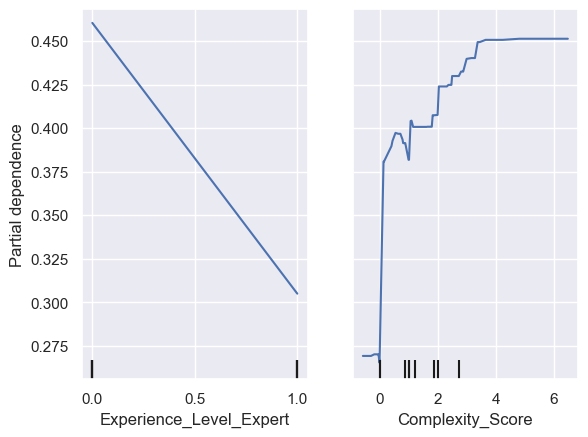

In [53]:
# -------------------------
# STEP H: Interpretability - permutation importance + PDP for top features
# -------------------------
print("\nPermutation importance (stack final estimator uses top base model or logistic meta?) We'll show importance from best base model by F1:")

best_base_name = top3[0][0]
best_base_model = top3[0][1]["model"]
perm = permutation_importance(best_base_model, X_test, y_test, n_repeats=12, random_state=RND, n_jobs=-1)
imp_df = pd.DataFrame({"feature": X_test.columns, "imp_mean": perm.importances_mean, "imp_std": perm.importances_std})
imp_df = imp_df.sort_values("imp_mean", ascending=False).reset_index(drop=True)
display(imp_df.head(15))

# PDP for top 2 numeric features
top_numeric = [f for f in imp_df.feature.head(5).tolist() if X_test[f].dtype != "object"]
if top_numeric:
    try:
        PartialDependenceDisplay.from_estimator(best_base_model, X_test, features=top_numeric[:2], kind="average")
        plt.show()
    except Exception as e:
        print("PDP skipped:", e)

In [54]:
# -------------------------
# STEP I: Error analysis (FP / FN) and short summary
# -------------------------
pred_labels = stack_pred_opt
err_df = X_test.reset_index(drop=True).copy()
err_df["Actual"] = y_test.reset_index(drop=True)
err_df["Prob"] = probs
err_df["Pred"] = pred_labels

fp = err_df[(err_df["Actual"]==0)&(err_df["Pred"]==1)]
fn = err_df[(err_df["Actual"]==1)&(err_df["Pred"]==0)]
print("\nFP count:", len(fp), "FN count:", len(fn))
if len(fp): display(fp.head())
if len(fn): display(fn.head())

# Show means for a few interpretable columns if exist
compare_cols = [c for c in ["Distance_km","Traffic_Level","Is_Peak_Hour","Risk_Factor","Courier_Experience_yrs"] if c in X_test.columns]
if compare_cols and (not fp.empty or not fn.empty):
    summary = pd.DataFrame({
        "FP_mean": fp[compare_cols].mean(),
        "FN_mean": fn[compare_cols].mean(),
        "TP_mean": err_df[(err_df["Actual"]==1)&(err_df["Pred"]==1)][compare_cols].mean(),
        "TN_mean": err_df[(err_df["Actual"]==0)&(err_df["Pred"]==0)][compare_cols].mean()
    })
    display(summary)


FP count: 86 FN count: 10


,Distance_km,Traffic_Level,Preparation_Time_min,Courier_Experience_yrs,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Time_of_Day_Evening,Time_of_Day_Night,...,Experience_Level_Expert,High_Distance,Risk_Factor,Weather_Severity,Speed_kmph,Experience_X_Traffic,Complexity_Score,Actual,Prob,Pred
4,1.025681,0.0,0.280241,1.466150e-01,0,1,0,0,1,0,...,0,0,0.0,1,219.599951,0.000000,1.0,0,0.324382,1
5,-1.501626,2.0,-0.414112,-8.990947e-01,0,0,0,0,0,0,...,0,0,-0.0,0,217.568128,-1.798189,2.0,0,0.475678,1
9,0.103627,1.0,0.835723,1.192325e+00,0,0,0,0,0,0,...,1,0,0.0,0,7.439782,1.192325,1.0,0,0.650606,1
15,0.793850,0.0,-0.552983,-3.095922e-16,0,0,0,0,0,0,...,0,0,0.0,0,-86.134747,-0.000000,0.0,0,0.529610,1
16,1.508662,0.0,0.280241,-8.990947e-01,1,0,0,0,0,1,...,0,0,0.0,1,323.006931,-0.000000,1.0,0,0.339593,1


,Distance_km,Traffic_Level,Preparation_Time_min,Courier_Experience_yrs,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Time_of_Day_Evening,Time_of_Day_Night,...,Experience_Level_Expert,High_Distance,Risk_Factor,Weather_Severity,Speed_kmph,Experience_X_Traffic,Complexity_Score,Actual,Prob,Pred
36,0.396928,1.0,0.002500,-0.201955,0,0,0,0,1,0,...,0,0,0.396928,0,9527.523342,-0.201955,1.396928,1,0.147609,0
91,1.696586,0.0,1.391205,0.495185,0,1,0,0,0,0,...,1,0,0.000000,1,73.170457,0.000000,1.000000,1,0.144939,0
93,1.452461,1.0,0.280241,-1.596234,1,0,0,0,0,0,...,0,0,1.452461,1,310.974119,-1.596234,3.452461,1,0.171732,0
95,-0.354766,1.0,1.391205,-1.596234,0,0,0,0,1,0,...,0,0,-0.354766,0,-15.300380,-1.596234,0.645234,1,0.166676,0
117,-0.988788,0.0,-0.969594,-1.247665,1,0,0,0,0,0,...,0,0,-0.000000,1,61.187761,-0.000000,1.000000,1,0.124906,0


,FP_mean,FN_mean,TP_mean,TN_mean
Distance_km,0.313892,-0.311737,0.413349,-0.811924
Traffic_Level,0.813953,0.700000,0.975000,0.562500
Is_Peak_Hour,0.593023,0.800000,0.600000,0.703125
Risk_Factor,0.136463,-0.158590,0.169617,-0.287399
Courier_Experience_yrs,0.133394,-0.236812,-0.226714,0.168401



Regression summary (we already created OOF Reg predictions earlier). Basic metrics:
Residual MAE = 7.334, RMSE = 10.879

Clustering for business insights (KMeans + GMM) — 3 clusters


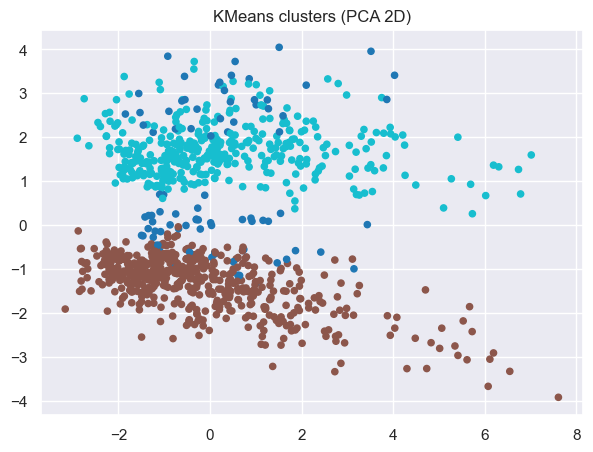

,Distance_km,Traffic_Level,Preparation_Time_min,Courier_Experience_yrs,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Time_of_Day_Evening,Time_of_Day_Night,...,Experience_Level_Intermediate,Experience_Level_Expert,High_Distance,Risk_Factor,Weather_Severity,Speed_kmph,Experience_X_Traffic,Complexity_Score,Delayed,count
Cluster_KMeans,,,,,,,,,,,,,,,,,,,,,
0,-0.096,0.894,0.024,-0.027,0.153,0.188,0.094,0.071,0.000,1.0,...,0.235,0.412,0.0,0.000,0.506,-880.005,0.077,1.400,0.271,85
1,-0.005,0.787,0.030,-0.700,0.109,0.163,0.098,0.094,0.327,0.0,...,0.506,0.000,0.0,0.012,0.464,158.573,-0.539,1.263,0.270,541
2,0.030,0.834,-0.048,1.019,0.083,0.267,0.096,0.104,0.310,0.0,...,0.000,1.000,0.0,0.002,0.551,-279.024,0.846,1.387,0.217,374


High-risk cluster (by delay rate): 0


In [55]:
# -------------------------
# STEP J: Regression models (predict minutes late) [optional]
# We'll provide a simple reg block using the same chosen_features; this was done earlier OOF.
# -------------------------
print("\nRegression summary (we already created OOF Reg predictions earlier). Basic metrics:")
mae = np.mean(np.abs(df["Residual"]))
rmse = np.sqrt(np.mean(df["Residual"]**2))
print("Residual MAE = {:.3f}, RMSE = {:.3f}".format(mae, rmse))

# -------------------------
# STEP K: Clustering (KMeans + GMM) — no -1 labels, only 3 clusters
# -------------------------
print("\nClustering for business insights (KMeans + GMM) — 3 clusters")
operational_feats = [c for c in chosen_features if c in X.columns]
Xop = X[operational_feats].fillna(0)
scaler = StandardScaler()
Xop_s = scaler.fit_transform(Xop)

kmeans = KMeans(n_clusters=3, random_state=RND)
df["Cluster_KMeans"] = kmeans.fit_predict(Xop_s)

gmm = GaussianMixture(n_components=3, random_state=RND)
df["Cluster_GMM"] = gmm.fit_predict(Xop_s)

p2 = PCA(n_components=2, random_state=RND).fit_transform(Xop_s)
plt.figure(figsize=(7,5)); plt.scatter(p2[:,0], p2[:,1], c=df["Cluster_KMeans"], cmap="tab10", s=20); plt.title("KMeans clusters (PCA 2D)"); plt.show()

profile = df.groupby("Cluster_KMeans")[operational_feats + ["Delayed"]].mean().round(3)
profile["count"] = df.groupby("Cluster_KMeans").size()
display(profile)
print("High-risk cluster (by delay rate):", profile["Delayed"].idxmax())


In [56]:

# -------------------------
# Final summary prints (key metrics)
# -------------------------
print("\nFINAL METRICS (stacking after threshold optimization):")
print("Accuracy:", round(accuracy_score(y_test, stack_pred_opt),3))
print("F1:", round(f1_score(y_test, stack_pred_opt),3))
print("ROC-AUC:", round(roc_auc_score(y_test, stack_proba),3))
print("Average Precision (AP):", round(average_precision_score(y_test, stack_proba),3))
print("\nTop features by permutation importance (best base model):")
display(imp_df.head(10))




FINAL METRICS (stacking after threshold optimization):
Accuracy: 0.52
F1: 0.455
ROC-AUC: 0.621
Average Precision (AP): 0.333

Top features by permutation importance (best base model):


,feature,imp_mean,imp_std
0,Experience_Level_Expert,0.042083,0.020048
1,Complexity_Score,0.039167,0.015115
2,Courier_Experience_yrs,0.035000,0.017321
3,Weather_Windy,0.028333,0.008498
4,Vehicle_Type_Car,0.023750,0.012768
5,Distance_km,0.016250,0.022742
6,Vehicle_Type_Scooter,0.012917,0.015064
7,Risk_Factor,0.012083,0.013763
8,Weather_Severity,0.011667,0.004249
9,Time_of_Day_Evening,0.007500,0.006922


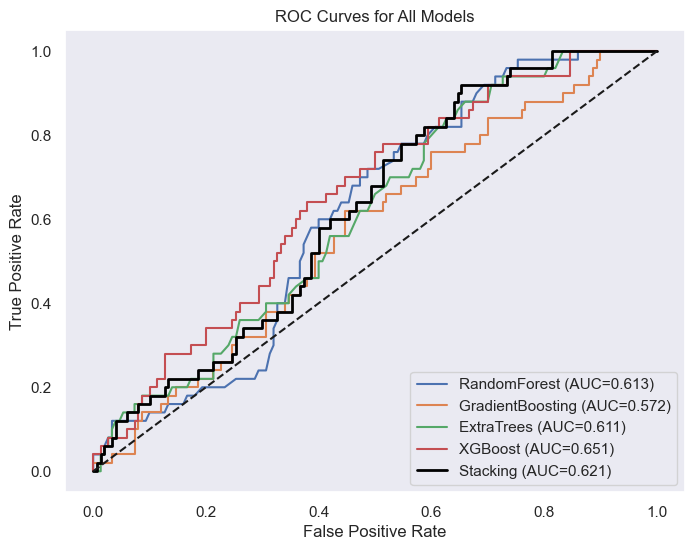

In [57]:
from sklearn.metrics import roc_curve

plt.figure(figsize=(8,6))
for name, info in models_eval.items():
    probs = info["model"].predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, probs)
    auc_score = roc_auc_score(y_test, probs)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc_score:.3f})")

# Stacking ROC
fpr_stack, tpr_stack, _ = roc_curve(y_test, stack_proba)
plt.plot(fpr_stack, tpr_stack, label=f"Stacking (AUC={roc_auc_score(y_test, stack_proba):.3f})", lw=2, color='black')

plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curves for All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [64]:
# Predicted delivery time
df["Predicted_Delivery_Time"] = df["Reg_Pred"]

# Predicted delay minutes = actual or expected - predicted
# For unseen data, delay can be estimated as Predicted_Delivery_Time - Estimated on-time threshold
# Here, we can define it as:
df["Predicted_Delay_Min"] = df["Predicted_Delivery_Time"] - df["Delivery_Time_min"].mean()  # simple proxy
X_new = df[chosen_features].fillna(0)
df["Predicted_Delivery_Time"] = oof_model.fit(X_reg, y_reg).predict(X_new)
df["Predicted_Delay_Min"] = df["Predicted_Delivery_Time"] - df["Delivery_Time_min"].mean()
df["Predicted_Label"] = (df["Predicted_Delivery_Time"] - df["Delivery_Time_min"].quantile(0.75) > 0).astype(int)


In [67]:
# Define a function
def delay_status(row, early_threshold=-5, ontime_threshold=5):
    if row['Predicted_Delay_Min'] > 0:
        return 'Delayed'
    elif row['Predicted_Delay_Min'] < early_threshold:
        return 'Early'
    else:
        return 'On_Time'

# Apply to your DataFrame
df['Predicted_Status'] = df.apply(delay_status, axis=1)

# Quick check
df[['Predicted_Delay_Min','Predicted_Status']].head(10)


,Predicted_Delay_Min,Predicted_Status
0,-13.68010,Early
1,25.63995,Delayed
2,3.22990,Delayed
3,-18.87510,Early
4,12.81495,Delayed
5,2.91990,Delayed
6,-9.84010,Early
7,-6.10505,Early
8,-21.86510,Early
9,13.12990,Delayed


In [68]:
df

,Distance_km,Traffic_Level,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Time_of_Day_Evening,...,Residual,Delayed,Cluster_KMeans,Cluster_GMM,DT_Prob,DT_Pred,Predicted_Delivery_Time,Predicted_Delay_Min,Predicted_Label,Predicted_Status
0,-0.374085,0.0,-0.691853,-1.247665,43.0,0,0,0,1,0,...,3.21000,0,1,1,0.0,0,42.91500,-13.68010,0,Early
1,1.117008,1.0,0.419111,-0.899095,84.0,0,0,0,0,1,...,6.46445,1,1,1,1.0,1,82.23505,25.63995,1,Delayed
2,-0.094835,0.0,1.530076,-1.247665,59.0,1,0,0,0,0,...,-2.11000,0,0,0,1.0,1,59.82500,3.22990,0,Delayed
3,-0.460144,1.0,-1.663947,-1.247665,37.0,0,1,0,0,0,...,-1.79000,0,1,1,0.0,0,37.72000,-18.87510,0,Early
4,1.575401,0.0,-0.136371,0.146615,68.0,0,0,0,0,0,...,-8.02505,0,1,1,0.0,0,69.41005,12.81495,0,Delayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.273977,2.0,-0.552983,-0.550525,54.0,0,0,0,0,1,...,-5.28515,0,1,1,1.0,1,54.32000,-2.27510,0,On_Time
996,1.092420,0.0,-1.247335,1.540894,71.0,0,1,0,0,0,...,7.90500,1,2,2,1.0,1,68.73500,12.13990,0,Delayed
997,0.976505,2.0,1.252335,-0.899095,81.0,0,0,1,0,1,...,-10.75585,0,1,1,0.0,0,84.76520,28.17010,1,Delayed
998,0.721842,0.0,-1.247335,-1.596234,55.0,0,0,0,0,0,...,-0.24500,0,1,1,0.0,0,55.81500,-0.78010,0,On_Time
